In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape)
# Reshape the data to add a channel dimension
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

(60000, 28, 28)


In [3]:
import numpy as np

def PCA(X, n_components):
  n = X.shape[0]

  X_mean = np.mean(X, axis=0)
  X_std = np.std(X, axis=0)
  X_std[X_std == 0] = 1
  Z = (X - X_mean) / X_std

  R = (1/n) * Z.T.dot(Z)

  eigenvalues, eigenvectors = np.linalg.eig(R)

  sorted_indices = np.argsort(eigenvalues)[::-1]
  eigenvalues = eigenvalues[sorted_indices]
  print(eigenvalues)
  eigenvectors = eigenvectors[:, sorted_indices]

  principal_components = eigenvectors[:, :n_components]

  X_reduced = np.dot(Z, principal_components)

  return X_reduced, principal_components, eigenvalues
X = np.array([
  [40, 5, 6],
  [40, 3, 4],
  [60, 6, 2],
  [60, 6, 4],
])

X_reduced, principal_components, eigenvalues = PCA(X, n_components=2)

print("Reduced Data (X_reduced):")
print(X_reduced)
print("\nPrincipal Components:")
print(principal_components)
print("\nEigenvalues:")
print(eigenvalues)

[2.23302023 0.71476896 0.05221081]
Reduced Data (X_reduced):
[[-1.37688401  1.03443063]
 [-1.56530923 -1.09779858]
 [ 1.83014246 -0.50769513]
 [ 1.11205079  0.57106308]]

Principal Components:
[[ 0.65879234  0.04432758]
 [ 0.55512596  0.6451166 ]
 [-0.50776749  0.76279724]]

Eigenvalues:
[2.23302023 0.71476896 0.05221081]


In [4]:
X_reconstructed = 0
for i in range(principal_components.shape[1]):
  X_reconstructed += X_reduced[:, i].reshape(-1, 1).dot(principal_components[:, i].reshape(-1, 1).T)

print(X_reconstructed)

[[-0.86122683 -0.09701568  1.48819777]
 [-1.07987648 -1.57715188 -0.04258459]
 [ 1.18317893  0.68843703 -1.31655529]
 [ 0.75792438  0.98573053 -0.1290579 ]]


In [5]:
import numpy as np

def PCA_Quality(X, q, X_mean, X_std):
  n = X.shape[0]

  X_std[X_std == 0] = 1
  Z = (X - X_mean) / X_std

  R = (1/n) * Z.T.dot(Z)

  eigenvalues, eigenvectors = np.linalg.eig(R)
  eigenvalues = np.real(eigenvalues)
  eigenvectors = np.real(eigenvectors)

  sorted_indices = np.argsort(eigenvalues)[::-1]
  eigenvalues = eigenvalues[sorted_indices]
  eigenvectors = eigenvectors[:, sorted_indices]

  for i in range(len(eigenvalues)):
    calc_quality = np.sum(eigenvalues[:i]) / np.sum(eigenvalues)
    if(calc_quality >= q):
      break


  principal_components = eigenvectors[:, :i]

  X_reduced = np.real(np.dot(Z, principal_components))

  return X_reduced, principal_components, eigenvalues

X_mean = np.mean(x_train, axis=0)
X_std = np.std(x_train, axis=0)

x_reduced, principal_components, eigenvalues = PCA_Quality(x_train, 0.9, X_mean, X_std)
print("Reduced Data (x_reduced):")
print(x_reduced)
print("\nPrincipal Components:")
print(principal_components.shape[1])
print("\nEigenvalues:")
print(eigenvalues)

x_reduced_test, principal_components_test, eigenvalues_test = PCA_Quality(x_test, 0.9, X_mean, X_std)
print("Reduced Data (x_reduced_test):")
print(x_reduced_test)
print("\nPrincipal Components:")
print(principal_components_test.shape[1])
print("\nEigenvalues:")
print(eigenvalues_test)

np.savez("backend/arrays.npz", X_mean=X_mean, X_std=X_std, principal_components=principal_components)

Reduced Data (x_reduced):
[[ 9.22158806e-01 -4.81479035e+00 -6.75598364e-02 ...  1.11448517e+00
   1.22286197e+00  1.34524760e+00]
 [-8.70897698e+00 -7.75440302e+00  3.44791044e+00 ...  3.26260872e-04
   1.10382968e-01  3.83387792e-01]
 [-2.32838932e+00  9.43133817e+00  6.18411405e+00 ... -5.10907139e-01
   1.25670300e-01  7.16851330e-01]
 ...
 [ 3.77721201e+00 -3.23056436e+00  3.80619883e+00 ... -4.21868019e-01
   9.36909294e-01 -4.71188363e-01]
 [-1.72236917e+00 -4.94812525e+00 -6.95122764e-03 ...  4.03964433e-02
  -4.63424193e-01  6.67381828e-01]
 [ 1.42725062e+00 -6.17538558e+00  2.96768709e+00 ...  9.69108448e-01
  -8.78679278e-01  2.98589204e-01]]

Principal Components:
236

Eigenvalues:
[ 4.04869603e+01  2.92412102e+01  2.68113576e+01  2.06862734e+01
  1.80763488e+01  1.57329156e+01  1.37903793e+01  1.25173805e+01
  1.10066118e+01  1.00503295e+01  9.62029745e+00  8.63082971e+00
  7.99146367e+00  7.81475190e+00  7.37541493e+00  7.13046866e+00
  6.71386812e+00  6.60389742e+00  6.4

In [6]:
def reconstruct(X, principal_components):
  X_reconstructed = 0
  for i in range(principal_components.shape[1]):
    X_reconstructed += X[:, i].reshape(-1, 1).dot(principal_components[:, i].reshape(-1, 1).T)
  
  return X_reconstructed

x_reconstructed = reconstruct(x_reduced, principal_components)
print(x_reconstructed)
x_test_reconstructed = reconstruct(x_reduced_test, principal_components_test)
print(x_test_reconstructed)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [150]:
print(x_reconstructed.shape)
print(x_test_reconstructed.shape)

(60000, 784)
(10000, 784)


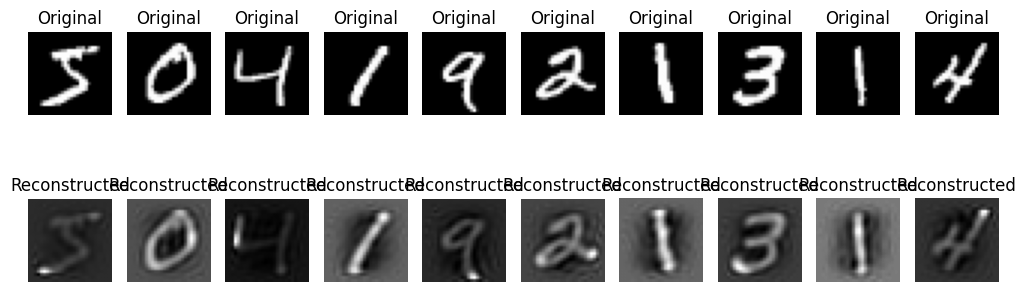

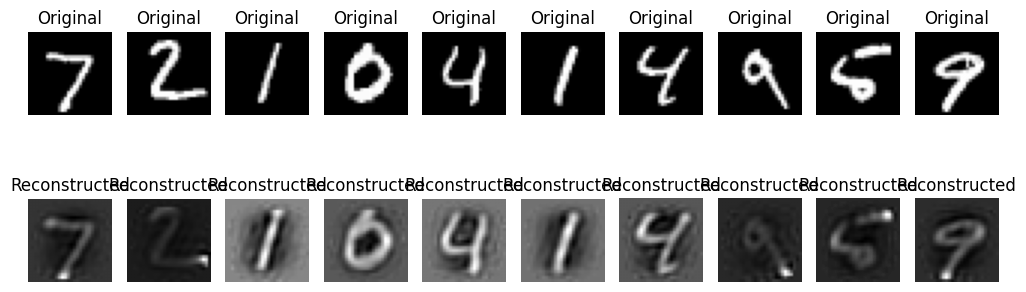

In [151]:
# Visualize the original and reconstructed images
def plot_images(original, reconstructed, n=5):
    plt.figure(figsize=(10, 4))
    for i in range(n):
        # Original
        plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')
        
        # Reconstructed
        plt.subplot(2, n, n + i + 1)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
        
    plt.tight_layout()
    plt.show()

plot_images(x_train, x_reconstructed, n=10)
plot_images(x_test, x_test_reconstructed, n=10)

In [7]:
x_reconstructed = x_reconstructed.reshape(-1, 28, 28, 1)
x_test_reconstructed = x_test_reconstructed.reshape(-1, 28, 28, 1)
print(x_reconstructed.shape)

(60000, 28, 28, 1)


In [8]:
model = models.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten and Dense Layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer (10 classes for digits 0-9)
])

C:\Users\radhi\PycharmProjects\snake_language\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
history = model.fit(x_reconstructed, y_train, epochs=10, validation_data=(x_test_reconstructed, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.9044 - loss: 0.3108 - val_accuracy: 0.9819 - val_loss: 0.0561
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9832 - loss: 0.0544 - val_accuracy: 0.9816 - val_loss: 0.0589
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9891 - loss: 0.0353 - val_accuracy: 0.9838 - val_loss: 0.0505
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9916 - loss: 0.0263 - val_accuracy: 0.9848 - val_loss: 0.0517
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9933 - loss: 0.0198 - val_accuracy: 0.9878 - val_loss: 0.0429
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9950 - loss: 0.0152 - val_accuracy: 0.9870 - val_loss: 0.0500
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9956 - loss: 0.0136 - val_accuracy: 0.9870 - val_loss: 0.0606
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9967 -

In [11]:
test_loss, test_acc = model.evaluate(x_test_reconstructed, y_test)
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9809 - loss: 0.0865
Test Accuracy: 0.9840999841690063


(28, 28, 1)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


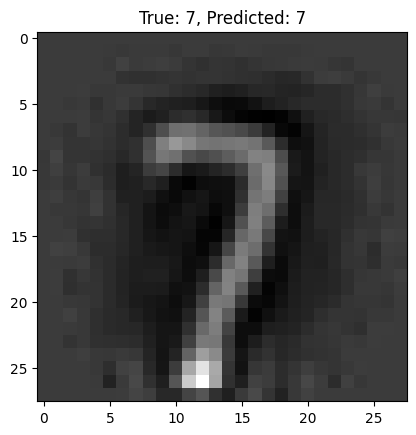

In [12]:
import numpy as np

# Pick a random test image
idx = np.random.randint(0, len(x_test))
test_image = x_test_reconstructed[idx]
test_label = y_test[idx]

# Predict the digit
print(test_image.shape)
print(test_image.reshape(1, 28, 28, 1).shape)
predicted_label = np.argmax(model.predict(test_image.reshape(1, 28, 28, 1)))

plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f"True: {test_label}, Predicted: {predicted_label}")
plt.show()

In [13]:

# Save the model
model.save('backend/mnist_cnn_pca_model.keras')

# Load the model
loaded_model = tf.keras.models.load_model('backend/mnist_cnn_pca_model.keras')